## Automating National Briefings
Author: Smitha Mahesh, Eric Englin, Sophie Son

Purpose: To complete the analyses and visualizations required for the program-level briefings. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import docx

In [2]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing"
os.chdir(myworkingdirectory)

In [3]:
analysis_2022 = pd.read_csv(".//Data//Output Data//analysis_database_2022.csv")

# National Data Trends 

## Table 1:  Servicewide Fatal and Injury Crash Types (1990-2021, data from STARS, CDS, IMARS) 

### national VRU crash stats 

In [4]:
vru = analysis_2022.loc[analysis_2022['VRU']==1]
vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
vru_total_crashes = vru.shape[0]
vru_percent = round(vru.shape[0]/analysis_2022.shape[0]*100,2)
vru_injury = int(vru['Num_Injuries'].sum())
vru_serious_injury = int(vru['Incapacitating Injury'].sum())
vru_fatals = int(vru['Num_Fatalities'].sum())
vru_inj_or_fatal_percent = round(vru_inj_or_fatal.shape[0]/vru.shape[0]*100,2)

print(vru_total_crashes,"number of crash reports involving VRUs")
print(vru_percent, "% of total crashes involving VRUs")
print(vru_injury, "total injuries in VRU crashes")
print(vru_serious_injury, "serious injuries in VRU crashes")
print(vru_fatals, "fatalities in VRU crashes")
print(vru_inj_or_fatal_percent, "% of VRU crashes resulting in an injury or fatality")

2815 number of crash reports involving VRUs
1.37 % of total crashes involving VRUs
1282 total injuries in VRU crashes
581 serious injuries in VRU crashes
26 fatalities in VRU crashes
47.42 % of VRU crashes resulting in an injury or fatality


### national wildlife crash stats 

In [5]:
animal = analysis_2022.loc[analysis_2022['Involving Animal']==1]
animal_inj_or_fatal = animal.loc[animal['Injury or Fatal']==1]
animal_total_crashes = animal.shape[0]
animal_percent = round(animal.shape[0]/analysis_2022.shape[0]*100,2)
animal_injury = int(animal['Num_Injuries'].sum())
animal_serious_injury = int(animal['Incapacitating Injury'].sum())
animal_fatals = int(animal['Num_Fatalities'].sum())
animal_inj_or_fatal_percent = round(animal_inj_or_fatal.shape[0]/animal.shape[0]*100,2)

print(animal_total_crashes,"number of crash reports involving wildlife")
print(animal_percent, "% of total crashes involving wildlife")
print(animal_injury, "total injuries in wildlife crashes")
print(animal_serious_injury, "serious injuries in wildlife crashes")
print(animal_fatals, "fatalities in wildlife crashes")
print(animal_inj_or_fatal_percent, "% of wildlife crashes resulting in an injury or fatality")

22743 number of crash reports involving wildlife
11.03 % of total crashes involving wildlife
2856 total injuries in wildlife crashes
402 serious injuries in wildlife crashes
28 fatalities in wildlife crashes
9.59 % of wildlife crashes resulting in an injury or fatality


### total national crash stats 

In [6]:
inj_or_fatal = analysis_2022.loc[analysis_2022['Injury or Fatal']==1]
total_crashes = analysis_2022.shape[0]
total_percent = round(analysis_2022.shape[0]/analysis_2022.shape[0]*100,2)
total_injury = int(analysis_2022['Num_Injuries'].sum())
total_serious_injury = int(analysis_2022['Incapacitating Injury'].sum())
total_fatals = int(analysis_2022['Num_Fatalities'].sum())
inj_or_fatal_percent = round(inj_or_fatal.shape[0]/analysis_2022.shape[0]*100,2)

print("total number of crash reports:", total_crashes)
print("% of total crashes:", total_percent)
print("total number of injuries:", total_injury)
print("total number of serious injuries:", total_serious_injury)
print("total number of fatalities:", total_fatals)
print("% of total crashes resulting in an injury or fatality:", inj_or_fatal_percent)

total number of crash reports: 206111
% of total crashes: 100.0
total number of injuries: 52604
total number of serious injuries: 10968
total number of fatalities: 1257
% of total crashes resulting in an injury or fatality: 17.51


### assemble table

In [7]:
nationaldata= {'Collision Type': ['Crashes Involving VRUs','Crashes Involving Wildlife', 'All Crashes'], 'Number of Crash Reports': [vru_total_crashes, animal_total_crashes, total_crashes], 'Percentage of Total Crashes': [vru_percent, animal_percent, total_percent], 'Number of Injuries':[vru_injury, animal_injury, total_injury], 'Number of Serious Injuries':[vru_serious_injury, animal_serious_injury, total_serious_injury], 'Number of Fatalities':[vru_fatals, animal_fatals, total_fatals], 'Percent of Crashes Resulting in an Injury/Fatality':[vru_inj_or_fatal_percent, animal_inj_or_fatal_percent, inj_or_fatal_percent]}
df5 = pd.DataFrame(nationaldata)
print(df5)

               Collision Type  Number of Crash Reports  \
0      Crashes Involving VRUs                     2815   
1  Crashes Involving Wildlife                    22743   
2                 All Crashes                   206111   

   Percentage of Total Crashes  Number of Injuries  \
0                         1.37                1282   
1                        11.03                2856   
2                       100.00               52604   

   Number of Serious Injuries  Number of Fatalities  \
0                         581                    26   
1                         402                    28   
2                       10968                  1257   

   Percent of Crashes Resulting in an Injury/Fatality  
0                                              47.42   
1                                               9.59   
2                                              17.51   


## Figure 1: All Crashes By Speed Limit

In [8]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
fatalities = []
serious_injuries = []
crashes = []

for i in speed_columns:
    num_fatalities = analysis_2022.loc[analysis_2022[i]==1]['Num_Fatalities'].sum()
    fatalities.append(num_fatalities)
    num_serious_injuries = analysis_2022.loc[analysis_2022[i]==1]['Incapacitating Injury'].sum()
    serious_injuries.append(num_serious_injuries)    
    num_crashes = analysis_2022.loc[analysis_2022[i]==1].shape[0]
    crashes.append(num_crashes)

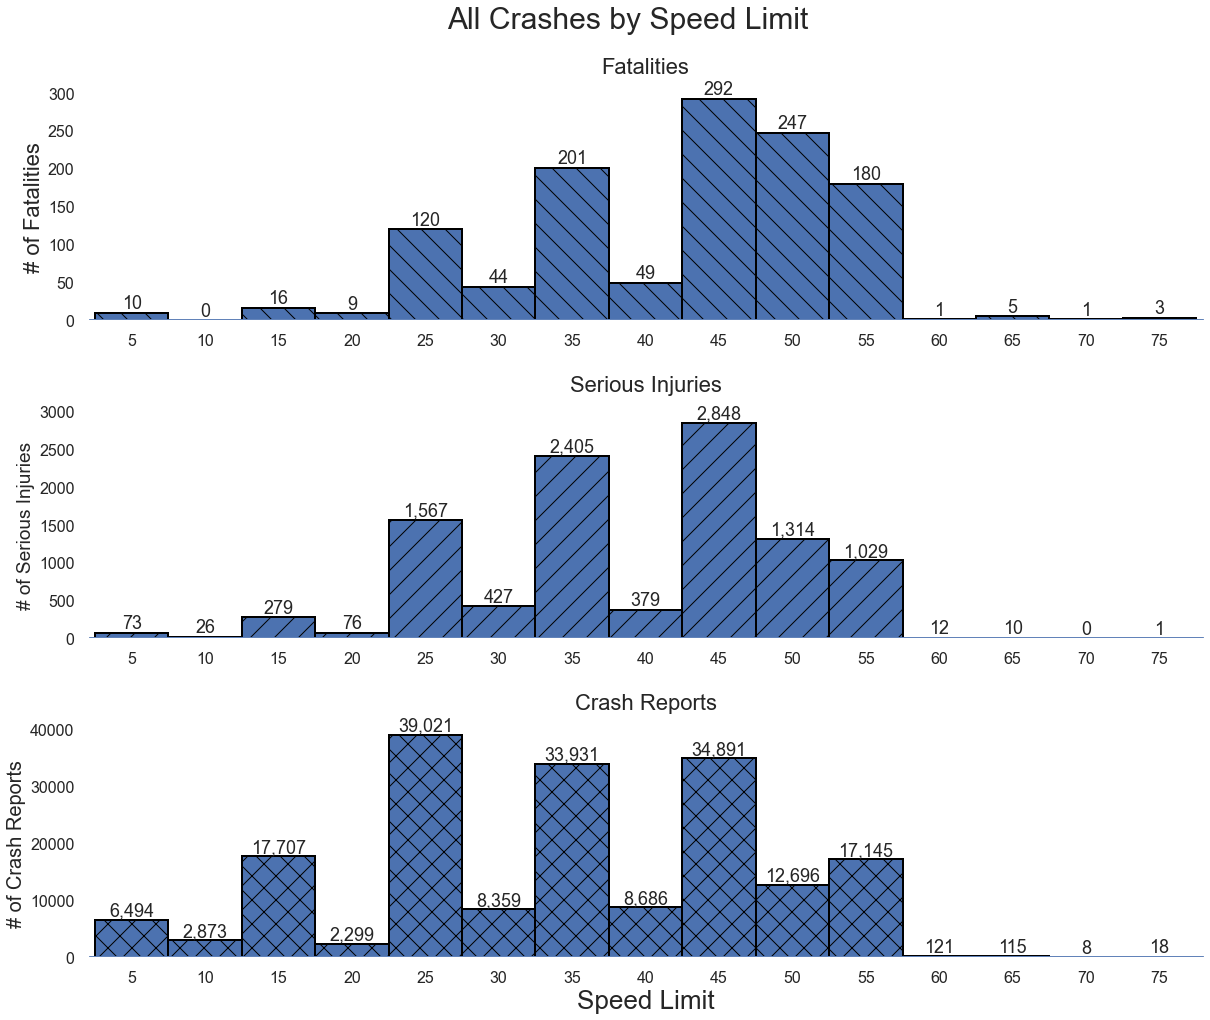

In [9]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('All Crashes by Speed Limit', fontsize=30)

# subplot data
ax[0].bar(speed_list, fatalities, width = 5, hatch = "\\", edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, serious_injuries, width = 5, hatch = "/", edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, crashes, width = 5, hatch = "x", edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 300])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 3000])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 40000])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 2: Crashes Resulting in an Injury or Fatality

In [10]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
inj_or_fatal = analysis_2022.loc[analysis_2022['Injury or Fatal']==1]
vru_inj_or_fatal = inj_or_fatal.loc[inj_or_fatal['VRU']==1]
animal_inj_or_fatal = inj_or_fatal.loc[inj_or_fatal['Involving Animal']==1]
VRU_crashes = []
wildlife_crashes = []
all_crashes = []

for i in speed_columns:
    num_VRU_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
    VRU_crashes.append(num_VRU_crashes)
    num_wildlife_crashes = animal_inj_or_fatal.loc[animal_inj_or_fatal[i]==1].shape[0]
    wildlife_crashes.append(num_wildlife_crashes)    
    num_all_crashes = inj_or_fatal.loc[inj_or_fatal[i]==1].shape[0]
    all_crashes.append(num_all_crashes)

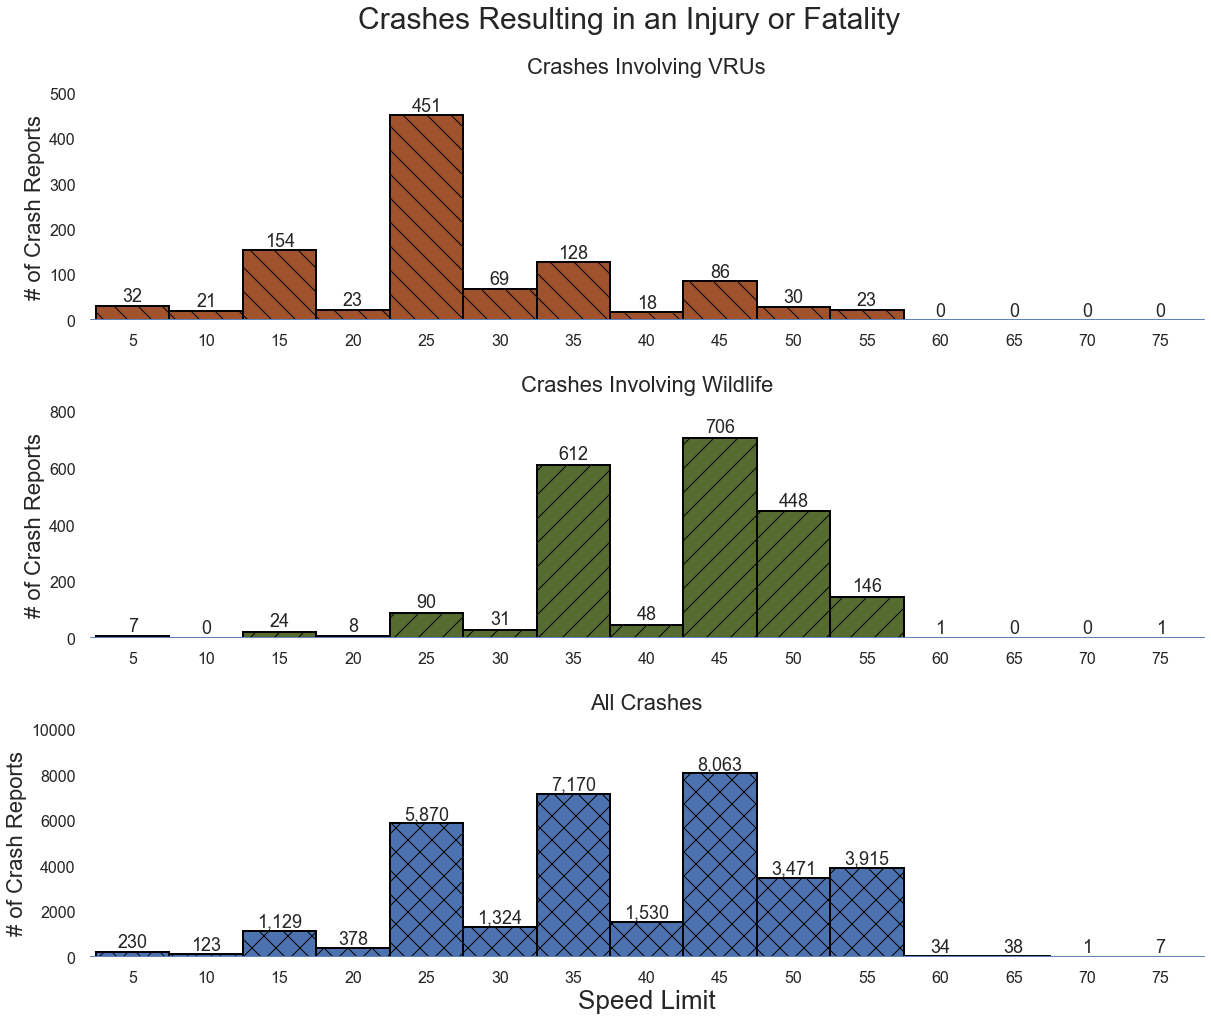

In [11]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('Crashes Resulting in an Injury or Fatality', fontsize=30)

# subplot data
ax[0].bar(speed_list, VRU_crashes, width = 5, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, wildlife_crashes, width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, all_crashes, width = 5, hatch = "x", edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Crashes Involving VRUs",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 500])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Crashes Involving Wildlife",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 800])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("All Crashes",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 10000])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 3: VRU Crashes By Speed Limit

In [12]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
vru = analysis_2022.loc[analysis_2022['VRU']==1]
vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
vru_fatalities = []
vru_serious_injuries = []
vru_crashes = []

for i in speed_columns:
    num_vru_fatalities = vru.loc[vru[i]==1]['Num_Fatalities'].sum()
    vru_fatalities.append(num_vru_fatalities)
    num_vru_serious_injuries = vru.loc[vru[i]==1]['Incapacitating Injury'].sum()
    vru_serious_injuries.append(num_vru_serious_injuries)    
    num_vru_crashes = vru.loc[vru[i]==1].shape[0]
    #num_vru_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
    vru_crashes.append(num_vru_crashes)

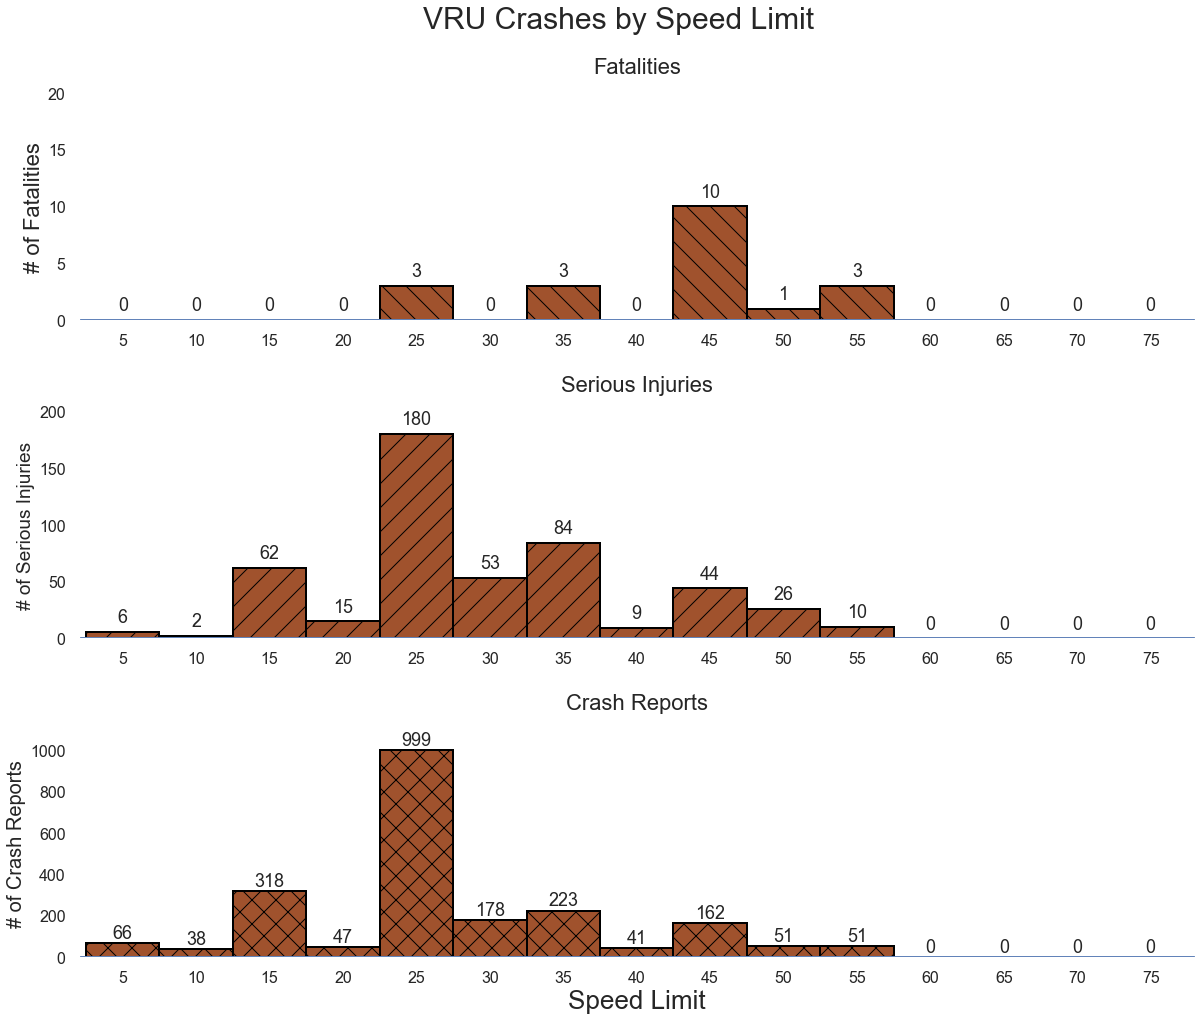

In [27]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('VRU Crashes by Speed Limit', fontsize=30)

# subplot data
ax[0].bar(speed_list, vru_fatalities, width = 5, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, vru_serious_injuries, width = 5, hatch = "/", color = 'sienna', edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, vru_crashes, width = 5, hatch = "x", color = 'sienna', edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 20])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 200])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 1100])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 4: VRU Crashes at Crosswalks

In [14]:
crosswalks = ['Crosswalk','Outside a Crosswalk']
vru = analysis_2022.loc[analysis_2022['VRU']==1]
vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
vru_crosswalk_fatalities = []
vru_crosswalk_serious_injuries = []
vru_crosswalk_crashes = []

for i in crosswalks:
    num_vru_crosswalk_fatalities = vru.loc[vru[i]==1]['Num_Fatalities'].sum()
    vru_crosswalk_fatalities.append(num_vru_crosswalk_fatalities)
    num_vru_crosswalk_serious_injuries = vru.loc[vru[i]==1]['Incapacitating Injury'].sum()
    vru_crosswalk_serious_injuries.append(num_vru_crosswalk_serious_injuries)    
    num_vru_crosswalk_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
    vru_crosswalk_crashes.append(num_vru_crosswalk_crashes)

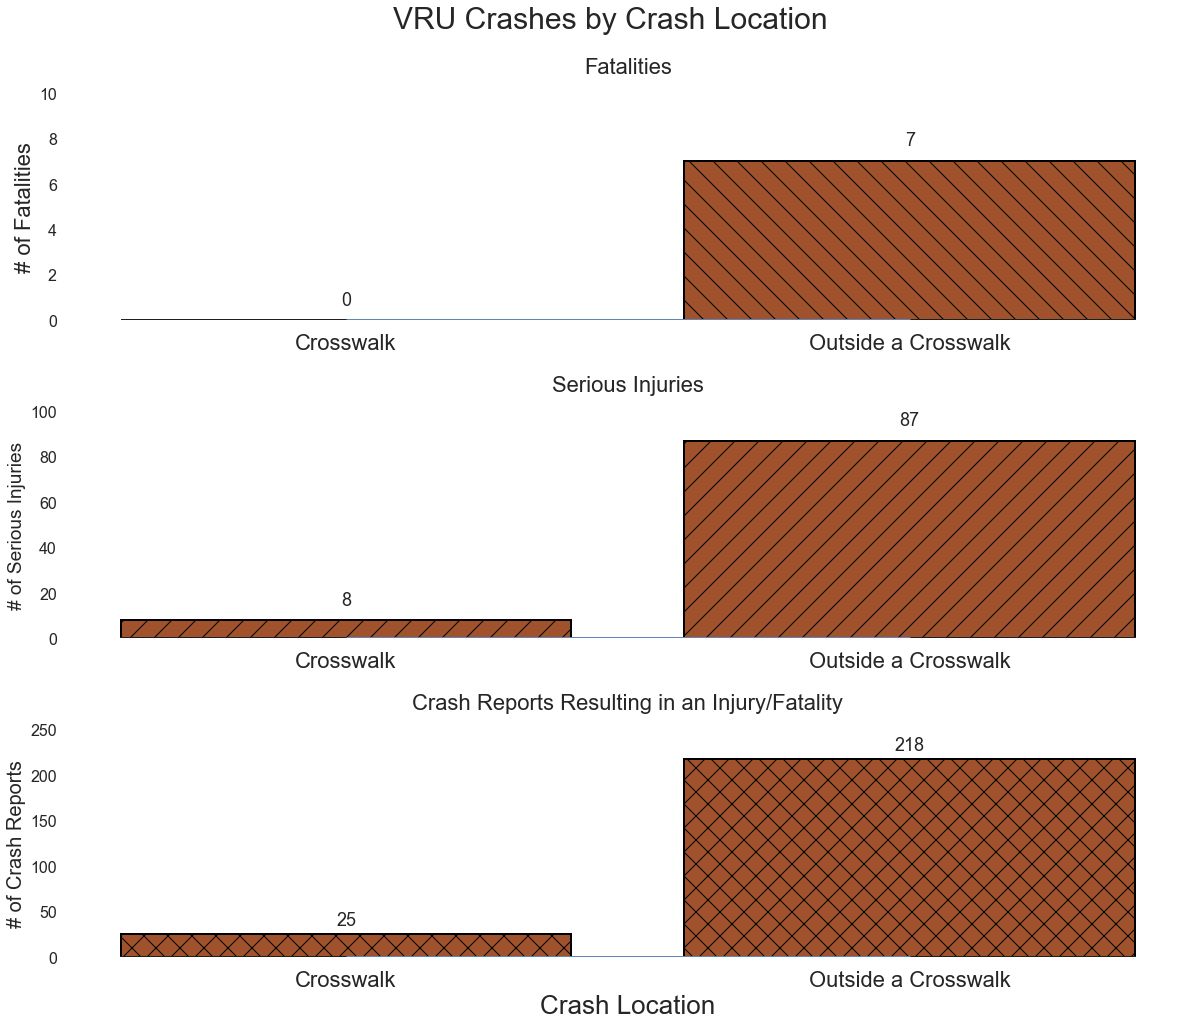

In [15]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
fig.suptitle('VRU Crashes by Crash Location', fontsize=30)

# subplot data
ax[0].bar(crosswalks, vru_crosswalk_fatalities, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
ax[1].bar(crosswalks, vru_crosswalk_serious_injuries, hatch = "/", color = 'sienna', edgecolor = "black", linewidth=2)
ax[2].bar(crosswalks, vru_crosswalk_crashes, hatch = "x", color = 'sienna', edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 10])
ax[0].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=22)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 100])
ax[1].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=22)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports Resulting in an Injury/Fatality",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 250])
ax[2].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
ax[2].set_xlabel('Crash Location',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=22)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 5: Wildlife Crashes By Speed Limit

In [16]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
animal = analysis_2022.loc[analysis_2022['Involving Animal']==1]
animal_inj_or_fatal = animal.loc[animal['Injury or Fatal']==1]
animal_fatalities = []
animal_serious_injuries = []
animal_crashes = []

for i in speed_columns:
    num_animal_fatalities = animal.loc[animal[i]==1]['Num_Fatalities'].sum()
    animal_fatalities.append(num_animal_fatalities)
    num_animal_serious_injuries = animal.loc[animal[i]==1]['Incapacitating Injury'].sum()
    animal_serious_injuries.append(num_animal_serious_injuries)    
    num_animal_crashes = animal.loc[animal[i]==1].shape[0]
    #num_animal_crashes = animal_inj_or_fatal.loc[animal_inj_or_fatal[i]==1].shape[0]
    animal_crashes.append(num_animal_crashes)

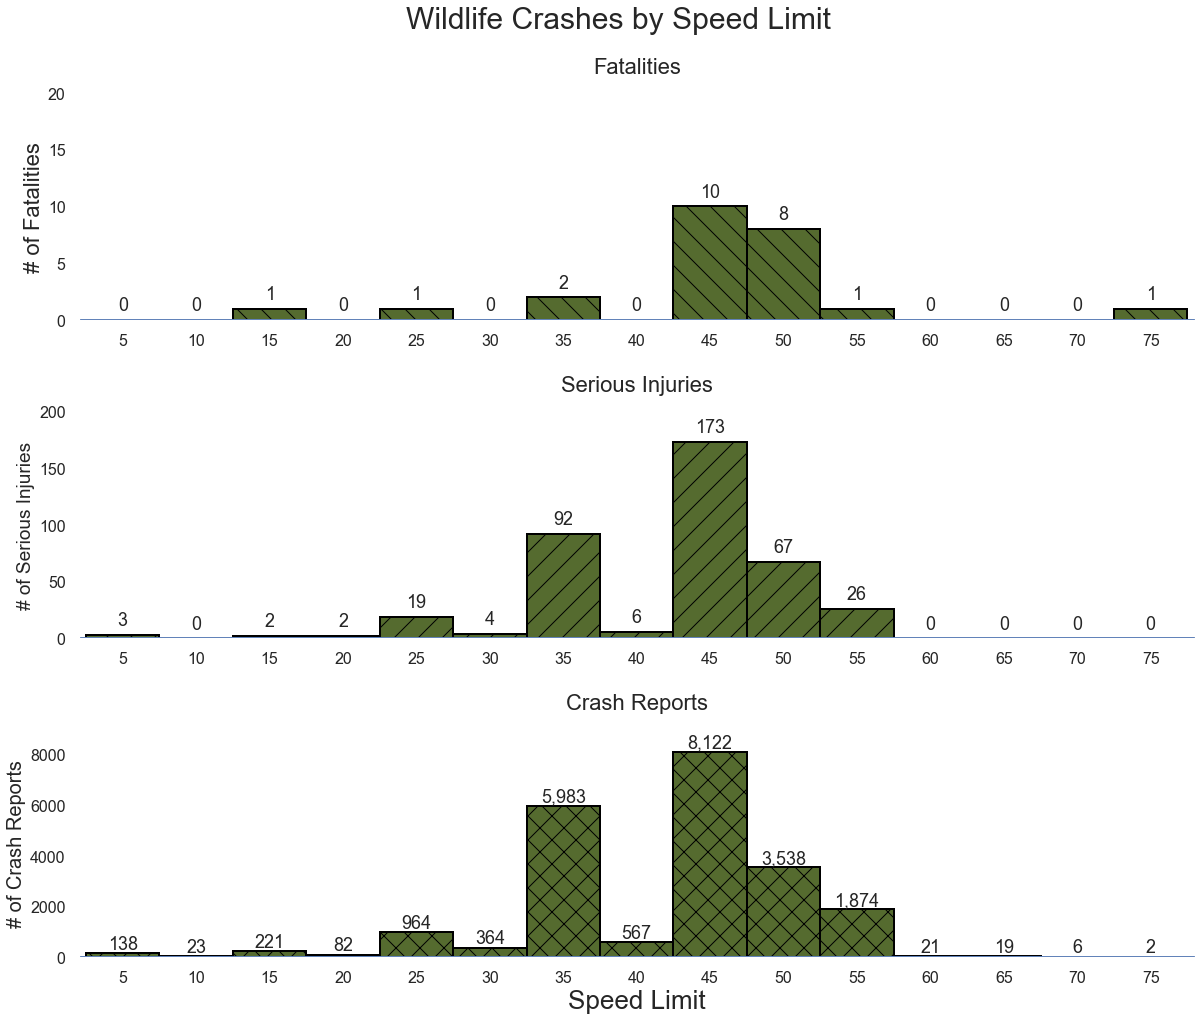

In [28]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('Wildlife Crashes by Speed Limit', fontsize=30)

# subplot data
ax[0].bar(speed_list, animal_fatalities, width = 5, hatch = "\\", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, animal_serious_injuries, width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, animal_crashes, width = 5, hatch = "x", color = 'darkolivegreen', edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 20])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 200])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 9000])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Data Quality Figures

In [18]:
len(analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==True])/len(analysis_2022.LATITUDE.isnull()==False)

0.8243082610826206

In [19]:
df_year_origin_coords =analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==False]
df_year_origin_coords

,INCID_NO,NUM_OCC,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,...,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR,database
4,ABLI140610163500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,38.912050,-76.934120,ABLI,SER,2014-06-10,1635,2014.0,CDS
348,ACAD090421120000,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,44.368910,-68.238560,ACAD,NER,2009-04-21,1200,2009.0,CDS
1617,ANTI150711111500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,39.405180,-77.751841,ANTI,NCR,2015-07-11,1115,2015.0,CDS
1788,ARCH150508151000,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,38.623760,-109.596920,ARCH,IMR,2015-05-08,1510,2015.0,CDS
1791,ARCH150623170000,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,38.622790,-109.601340,ARCH,IMR,2015-06-23,1700,2015.0,CDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206026,NP20125822,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.605187,-83.695478,CUGA,SER,2020-11-22,630,2020.0,IMARS
206027,PP20057279,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,38.940841,-77.133592,GWMP,NCR,2020-12-17,955,2020.0,IMARS
206028,NP20125797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,35.671851,-83.580464,GRSM,SER,2021-03-11,1730,2021.0,IMARS
206029,NP20125951,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,41.816467,-124.093035,REDW,PWR,2021-12-20,1330,2021.0,IMARS


In [20]:
analysis_2022['ones'] = 1
df_year_origin=analysis_2022.groupby(['database', "CRASH_YEAR"]).sum()
df_year_origin=df_year_origin.reset_index()
df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']<2022]
df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']>1988]

df_year_origin_coords =analysis_2022.loc[analysis_2022['LATITUDE'].notnull()]
df_year_origin_coords = df_year_origin_coords.groupby(['database', "CRASH_YEAR"]).sum()
df_year_origin_coords=df_year_origin_coords.reset_index()
df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']<2022]
df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']>1988]

#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)

In [21]:
cds_year = df_year_origin.loc[df_year_origin['database']=='CDS']
imars_year = df_year_origin.loc[df_year_origin['database']=='IMARS']
cds_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='CDS']
imars_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='IMARS']

## Figure 6: Serious Injury Crash Data Quality

In [22]:
max(cds_year['Incapacitating Injury'])

676.0

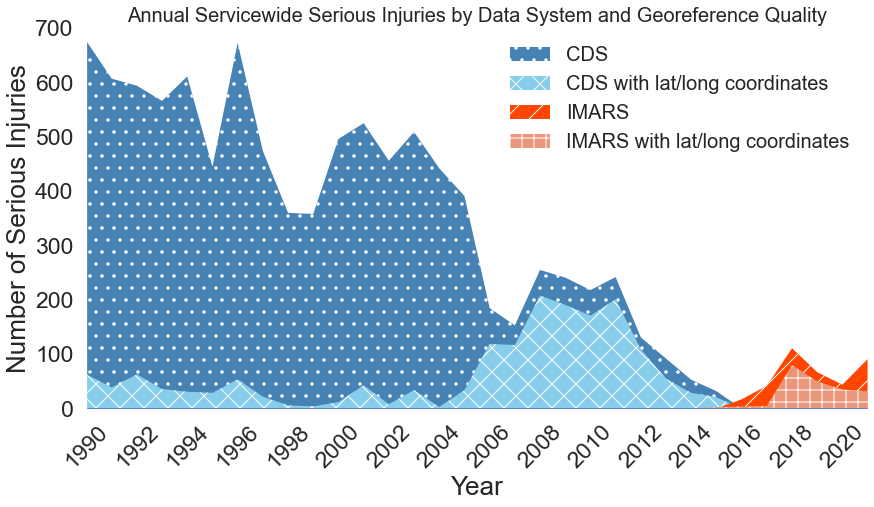

In [23]:
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Annual Servicewide Serious Injuries by Data System and Georeference Quality', fontsize=20)
ax.fill_between(cds_year["CRASH_YEAR"], cds_year['Incapacitating Injury'], label = 'CDS', 
       hatch = ".", facecolor = "steelblue")
ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Incapacitating Injury'], label = 'CDS with lat/long coordinates', 
       hatch = 'x', facecolor = "skyblue")
ax.fill_between(imars_year["CRASH_YEAR"], imars_year['Incapacitating Injury'], label = 'IMARS', 
       hatch = "/", facecolor = "orangered")
ax.fill_between(imars_year_coords["CRASH_YEAR"], imars_year_coords['Incapacitating Injury'], label = 'IMARS with lat/long coordinates', 
        hatch = "+", facecolor = "darksalmon")

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,700])
ax.set_yticks([0,100,200,300,400,500,600,700])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Serious Injuries", fontsize=26)

plt.show()

## Figure 7: Fatal Crash Data Quality

In [24]:
max(cds_year['Num_Fatalities'])

74.0

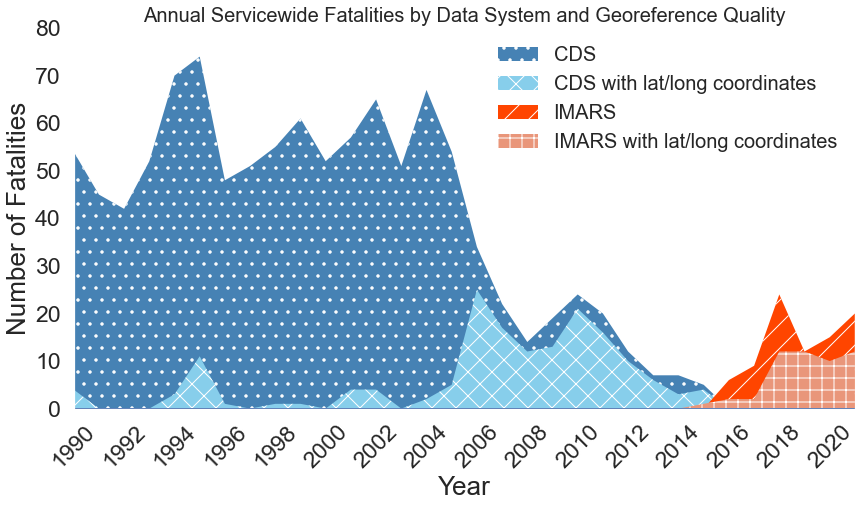

In [25]:
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Annual Servicewide Fatalities by Data System and Georeference Quality', fontsize=20)
ax.fill_between(cds_year["CRASH_YEAR"], cds_year['Num_Fatalities'], label = 'CDS', 
       hatch = ".", facecolor = "steelblue")
ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Num_Fatalities'], label = 'CDS with lat/long coordinates', 
       hatch = 'x', facecolor = "skyblue")
ax.fill_between(imars_year["CRASH_YEAR"], imars_year['Num_Fatalities'], label = 'IMARS', 
       hatch = "/", facecolor = "orangered")
ax.fill_between(imars_year_coords["CRASH_YEAR"], imars_year_coords['Num_Fatalities'], label = 'IMARS with lat/long coordinates', 
        hatch = "+", facecolor = "darksalmon")

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,80])
ax.set_yticks([0,10,20,30,40,50,60,70,80])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Fatalities", fontsize=26)

plt.show()